In [25]:
# Import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [29]:
# Read in all dates
cpi = pd.read_excel("consumer-price-inflation.xlsx")
chicago_unemployment = pd.read_excel("chicago-unemp.xlsx")
houston_unemployment = pd.read_excel("houston-unemp.xlsx")
phoenix_unemployment = pd.read_excel("phoenix-unemp.xlsx")
la_unemployment = pd.read_excel("los-angeles-unemp.xlsx")
ny_unemployment = pd.read_excel("new-york-unemp.xlsx")

In [3]:
cpi.head()

,Country Code,IMF Country Code,Country,Indicator Type,Series Name,1970,1971,1972,1973,1974,...,2016,2017,2018,2019,2020,2021,2022,2023,2024,Note
0,ABW,314.0,Aruba,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,-0.890000,-0.474,3.58,4.257,1.222000,0.744000,5.520000,3.363,1.712000,Annual average inflation
1,AFG,512.0,Afghanistan,Inflation,Headline Consumer Price Inflation,25.510000,25.510000,-12.520000,-10.680000,10.230000,...,4.380000,4.976,0.63,2.302,5.443000,5.062000,10.600000,-7.714,-6.601186,Annual average inflation
2,AGO,614.0,Angola,Inflation,Headline Consumer Price Inflation,7.970000,5.780000,15.800000,15.670000,27.420000,...,32.377731,29.844,19.63,17.079,21.024000,23.846111,23.826819,13.639,28.240495,Annual average inflation
3,ALB,914.0,Albania,Inflation,Headline Consumer Price Inflation,NaN,NaN,NaN,NaN,NaN,...,1.291234,1.987,2.03,1.411,1.620887,2.041472,6.725203,4.769,2.214490,Annual average inflation
4,ARE,466.0,United Arab Emirates,Inflation,Headline Consumer Price Inflation,21.984699,21.984699,21.984699,21.984699,21.984699,...,1.619795,1.967,3.06,-1.931,-2.079403,0.180000,4.827889,1.624,1.663365,Annual average inflation


In [28]:
# Drop CPI for all countries except US and unnecessary columns
cpi_us = cpi[cpi['Country'] == 'United States'].copy()
cpi_us.drop(columns=['Country Code', 'IMF Country Code', 'Indicator Type', 'Series Name', 'Note', 'Country'], inplace=True)
cpi_us.head()

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
190,5.8953,4.292765,3.272283,6.177756,11.054799,9.143152,5.744812,6.501684,7.63096,11.254475,...,0.118625,1.261581,2.136,2.44,1.812,1.233584,4.697859,8.0028,4.128,2.949511


In [5]:
# Transpose the dataframe
cpi_us_t = cpi_us.T
cpi_us_t = cpi_us_t.reset_index().rename(columns={'index': 'Year', 190: 'CPI'})
cpi_us_t.head()

,Year,CPI
0,1970,5.895300
1,1971,4.292765
2,1972,3.272283
3,1973,6.177756
4,1974,11.054799


In [6]:
cpi_us_t.shape

(55, 2)

In [30]:
# Look at shapes of all unemployment datasets
print("Chicago Unemployment Shape:", chicago_unemployment.shape)
print("Houston Unemployment Shape:", houston_unemployment.shape)
print("Phoenix Unemployment Shape:", phoenix_unemployment.shape)
print("Los Angeles Unemployment Shape:", la_unemployment.shape)
print("New York Unemployment Shape:", ny_unemployment.shape)

Chicago Unemployment Shape: (427, 6)
Houston Unemployment Shape: (427, 6)
Phoenix Unemployment Shape: (427, 6)
Los Angeles Unemployment Shape: (427, 6)
New York Unemployment Shape: (595, 8)


In [36]:
# Look at head of all unemployment datasets
print(f"Chicago: \n {chicago_unemployment.head()}")
print(f"Houston: \n {houston_unemployment.head()}")
print(f"Phoenix: \n {phoenix_unemployment.head()}")
print(f"LA: \n {la_unemployment.head()}")
print(f"NY: \n {ny_unemployment.head()}")

Chicago: 
    Year Period  labor force  employment  unemployment  unemployment rate
0  1990    Jan      4165050     3877704        287346                6.9
1  1990    Feb      4158474     3883640        274834                6.6
2  1990    Mar      4158961     3895016        263945                6.3
3  1990    Apr      4159901     3887001        272900                6.6
4  1990    May      4168759     3910275        258484                6.2
Houston: 
    Year Period  labor force  employment  unemployment  unemployment rate
0  1990    Jan      1984076     1881055        103021                5.2
1  1990    Feb      1988590     1886513        102077                5.1
2  1990    Mar      1997856     1903040         94816                4.7
3  1990    Apr      2012121     1916293         95828                4.8
4  1990    May      2032188     1933128         99060                4.9
Phoenix: 
    Year Period  labor force  employment  unemployment  unemployment rate
0  1990    Jan    

In [38]:
# Percent missing values in each dataset
dfs = [chicago_unemployment, houston_unemployment, ny_unemployment, la_unemployment, phoenix_unemployment, cpi_us_t]

for df in dfs:
    print((df.isnull().sum() / len(df)) * 100)

Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                              0.0
Period                            0.0
labor force participation rate    0.0
employment-population ratio       0.0
labor force                       0.0
employment                        0.0
unemployment                      0.0
unemployment rate                 0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year                 0.0
Period               0.0
labor force          0.0
employment           0.0
unemployment         0.0
unemployment rate    0.0
dtype: float64
Year    0.0
CPI     0

## Exploratory Data Analysis

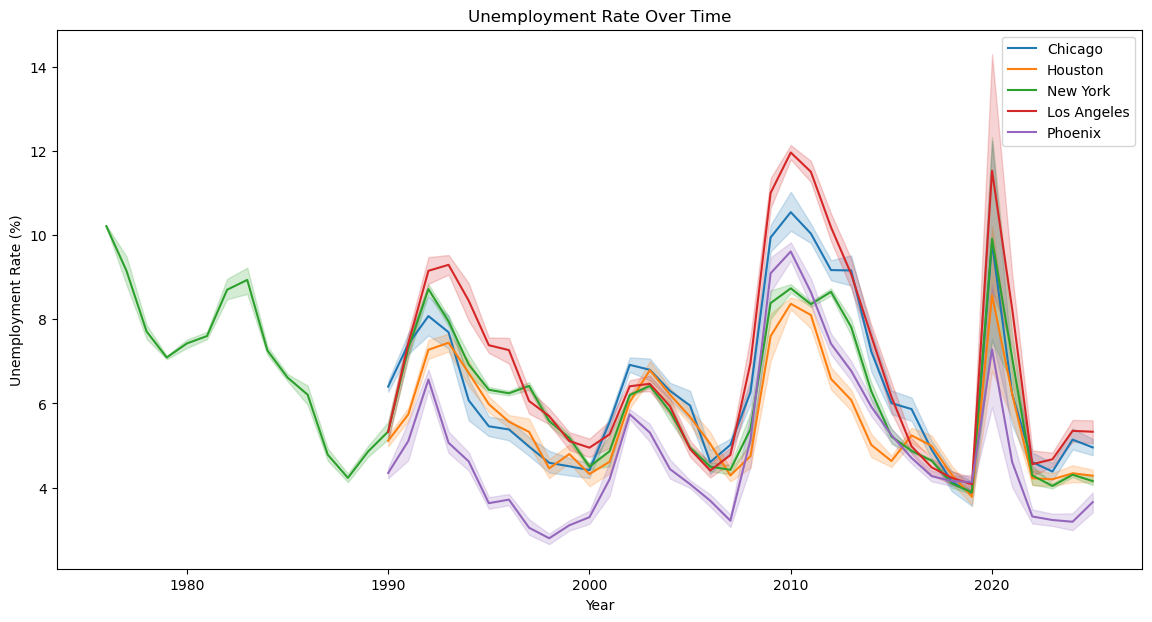

In [44]:
# Unemployment Rate Over Time
plt.figure(figsize=(14, 7))
sns.lineplot(data=chicago_unemployment, x='Year', y='unemployment rate', label='Chicago')
sns.lineplot(data=houston_unemployment, x='Year', y='unemployment rate', label='Houston')
sns.lineplot(data=ny_unemployment, x='Year', y='unemployment rate', label='New York')
sns.lineplot(data=la_unemployment, x='Year', y='unemployment rate', label='Los Angeles')
sns.lineplot(data=phoenix_unemployment, x='Year', y='unemployment rate', label='Phoenix')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()  

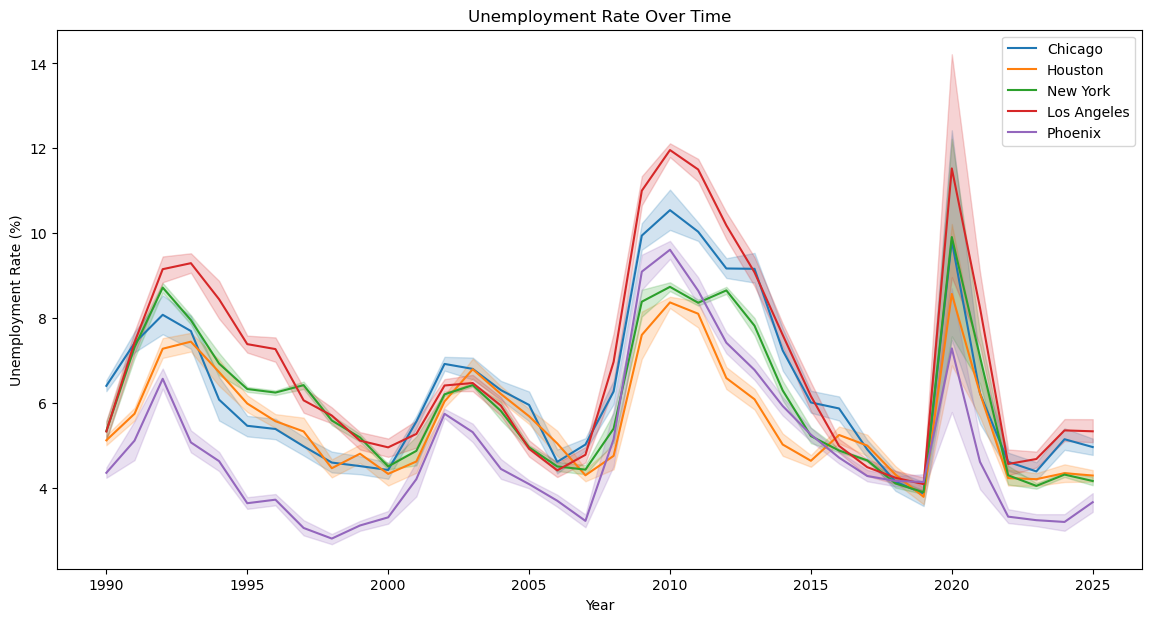

In [41]:
# Unemployment Rate Over Time with NY filtered 1990 onwards

plt.figure(figsize=(14, 7))
sns.lineplot(data=chi, x='Year', y='unemployment rate', label='Chicago')
sns.lineplot(data=htn, x='Year', y='unemployment rate', label='Houston')

nyc_filtered = ny[ny['Year'] >= 1990]
sns.lineplot(data=nyc_filtered, x='Year', y='unemployment rate', label='New York')
sns.lineplot(data=la, x='Year', y='unemployment rate', label='Los Angeles')
sns.lineplot(data=phx, x='Year', y='unemployment rate', label='Phoenix')
plt.title('Unemployment Rate Over Time')
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.legend()
plt.show()  

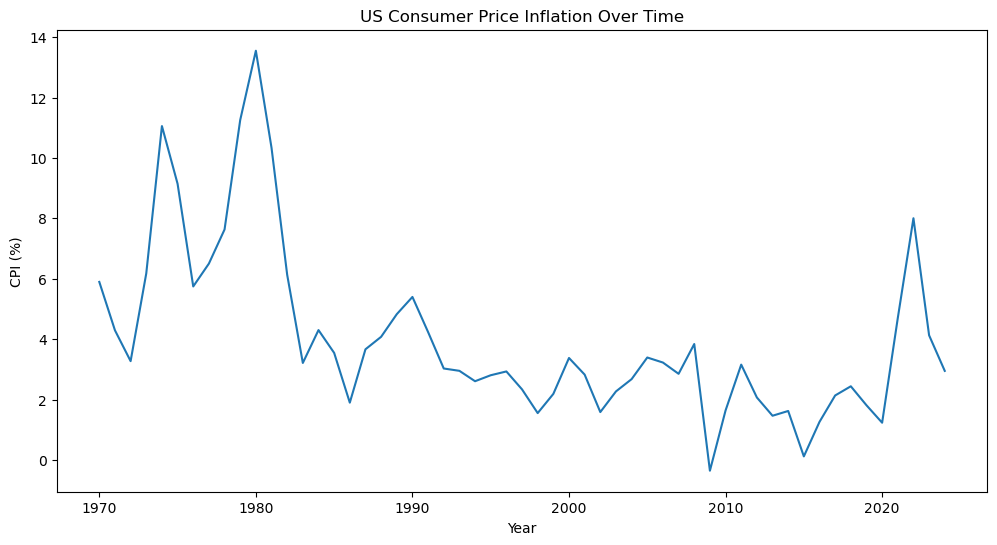

In [43]:
# Plot US CPI over time
plt.figure(figsize=(12, 6))
sns.lineplot(data=cpi_us_t, x='Year', y='CPI')
plt.title('US Consumer Price Inflation Over Time')
plt.xlabel('Year')
plt.ylabel('CPI (%)')
plt.show()

In [78]:
# Unemployment Data Preparation for Merging
chicago_unemp = chicago_unemployment[['Year', 'Period', 'unemployment rate']].rename(columns={'unemployment rate': 'Chicago'})
houston_unemp = houston_unemployment[['Year', 'Period', 'unemployment rate']].rename(columns={'unemployment rate': 'Houston'})
phoenix_unemp = phoenix_unemployment[['Year', 'Period', 'unemployment rate']].rename(columns={'unemployment rate': 'Phoenix'})
la_unemp = la_unemployment[['Year', 'Period', 'unemployment rate']].rename(columns={'unemployment rate': 'Los Angeles'})
ny_unemp = ny_unemployment[['Year', 'Period', 'unemployment rate']].rename(columns={'unemployment rate': 'New York'})


In [95]:
# Convert monthly data to quarter in each dataframe
for df in [chicago_unemp, houston_unemp, phoenix_unemp, la_unemp, ny_unemp]:
    # Define the period_to_quarter function
    def period_to_quarter(period):
        month_to_quarter = {
            'Jan': '1', 'Feb': '1', 'Mar': '1',
            'Apr': '2', 'May': '2', 'Jun': '2',
            'Jul': '3', 'Aug': '3', 'Sep': '3',
            'Oct': '4', 'Nov': '4', 'Dec': '4'
        }
        month = period[:3]
        return month_to_quarter.get(month, None)

    df['Quarter'] = df['Period'].apply(period_to_quarter)

# Aggregate to quarterly average for each city
chicago_quarterly = chicago_unemp.groupby(['Year', 'Quarter'])['Chicago'].mean().reset_index()
houston_quarterly = houston_unemp.groupby(['Year', 'Quarter'])['Houston'].mean().reset_index()
phoenix_quarterly = phoenix_unemp.groupby(['Year', 'Quarter'])['Phoenix'].mean().reset_index()
la_quarterly = la_unemp.groupby(['Year', 'Quarter'])['Los Angeles'].mean().reset_index()
ny_quarterly = ny_unemp.groupby(['Year', 'Quarter'])['New York'].mean().reset_index()


In [96]:
# Merge all quarterly dataframes
from functools import reduce

data_frames = [chicago_quarterly, houston_quarterly, phoenix_quarterly, la_quarterly, ny_quarterly]
quarterly_unemployment = reduce(lambda left, right: pd.merge(left, right, on=['Year', 'Quarter'], how='outer'), data_frames)
quarterly_unemployment.head()

,Year,Quarter,Chicago,Houston,Phoenix,Los Angeles,New York
0,1976,1,NaN,NaN,NaN,NaN,10.266667
1,1976,2,NaN,NaN,NaN,NaN,10.200000
2,1976,3,NaN,NaN,NaN,NaN,10.200000
3,1976,4,NaN,NaN,NaN,NaN,10.166667
4,1977,1,NaN,NaN,NaN,NaN,9.966667


In [97]:
final_unemployment = quarterly_unemployment[quarterly_unemployment['Year'] >= 1990]
final_unemployment

,Year,Quarter,Chicago,Houston,Phoenix,Los Angeles,New York
56,1990,1,6.600000,5.000000,4.400000,5.000000,5.133333
57,1990,2,6.400000,5.000000,4.400000,4.900000,5.000000
58,1990,3,6.466667,5.366667,4.533333,5.633333,5.266667
59,1990,4,6.133333,5.100000,4.066667,5.766667,5.933333
60,1991,1,7.166667,5.500000,4.266667,6.833333,6.700000
...,...,...,...,...,...,...,...
194,2024,3,5.500000,4.733333,3.600000,5.933333,4.400000
195,2024,4,4.700000,4.233333,3.266667,5.400000,4.400000
196,2025,1,5.233333,4.366667,3.566667,5.300000,4.300000
197,2025,2,4.700000,4.133333,3.600000,5.133333,4.066667


In [98]:
# Splitting years in quarters for CPI
cpi_us_t_quarters = cpi_us_t.loc[cpi_us_t.index.repeat(4)].reset_index(drop=True)
cpi_us_t_quarters['Quarter'] = np.tile([1, 2, 3, 4], len(cpi_us_t))
cpi_us_t_quarters.head(12)


,Year,CPI,Quarter
0,1970,5.895300,1
1,1970,5.895300,2
2,1970,5.895300,3
3,1970,5.895300,4
4,1971,4.292765,1
5,1971,4.292765,2
6,1971,4.292765,3
7,1971,4.292765,4
8,1972,3.272283,1
9,1972,3.272283,2


In [99]:
# Save relevant dataframes to csv
final_unemployment.to_csv("quarterly_unemployment.csv", index=False)
cpi_us_t_quarters.to_csv("cpi_us_quarters.csv", index=False)
chicago_quarterly.to_csv("chicago_quarterly_unemployment.csv", index=False)
houston_quarterly.to_csv("houston_quarterly_unemployment.csv", index=False)
phoenix_quarterly.to_csv("phoenix_quarterly_unemployment.csv", index=False)
la_quarterly.to_csv("la_quarterly_unemployment.csv", index=False)
ny_quarterly.to_csv("ny_quarterly_unemployment.csv", index=False)